In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
df = pd.read_table('../data/RFP/Sequence_to_Expression.txt')
df = df.dropna()
df.head()

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5


In [3]:
seq_map= pd.read_table('../data/RFP/Sequences.txt')

df = df[df['Ec'] != 'Blank']

df.loc[:, 'Ec'] = df['Ec'].astype(int)
seq_map.loc[:, 'Ec'] = seq_map['Ec'].astype(int)

df = df.merge(seq_map, on='Ec', how='left')

df['Rel_RFP'] = df['Ex550Em630'] / df['OD600']
df['Rel_GFP'] = df['Ex485Em535'] / df['OD600']

df.head()

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630,Description,sequence,Rel_RFP,Rel_GFP
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.702805e+04,1.219483e+06
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.239184e+04,1.142869e+06
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5,P5_G3A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,5.129690e+05,2.616918e+06
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5,P5_G3A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,4.903944e+05,2.745755e+06
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,4.056124e+06,1.495011e+06


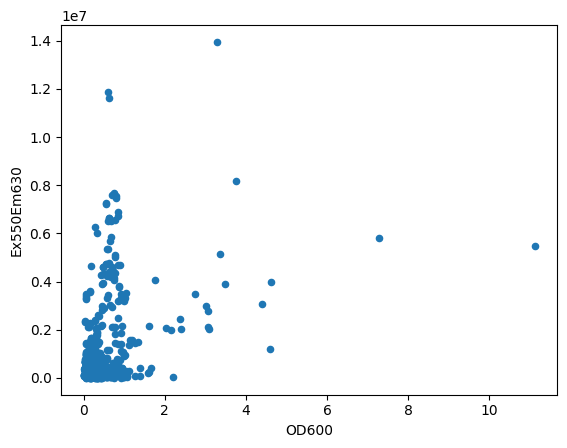

In [4]:
ax = df.plot.scatter(x='OD600', y='Ex550Em630')
plt.show()

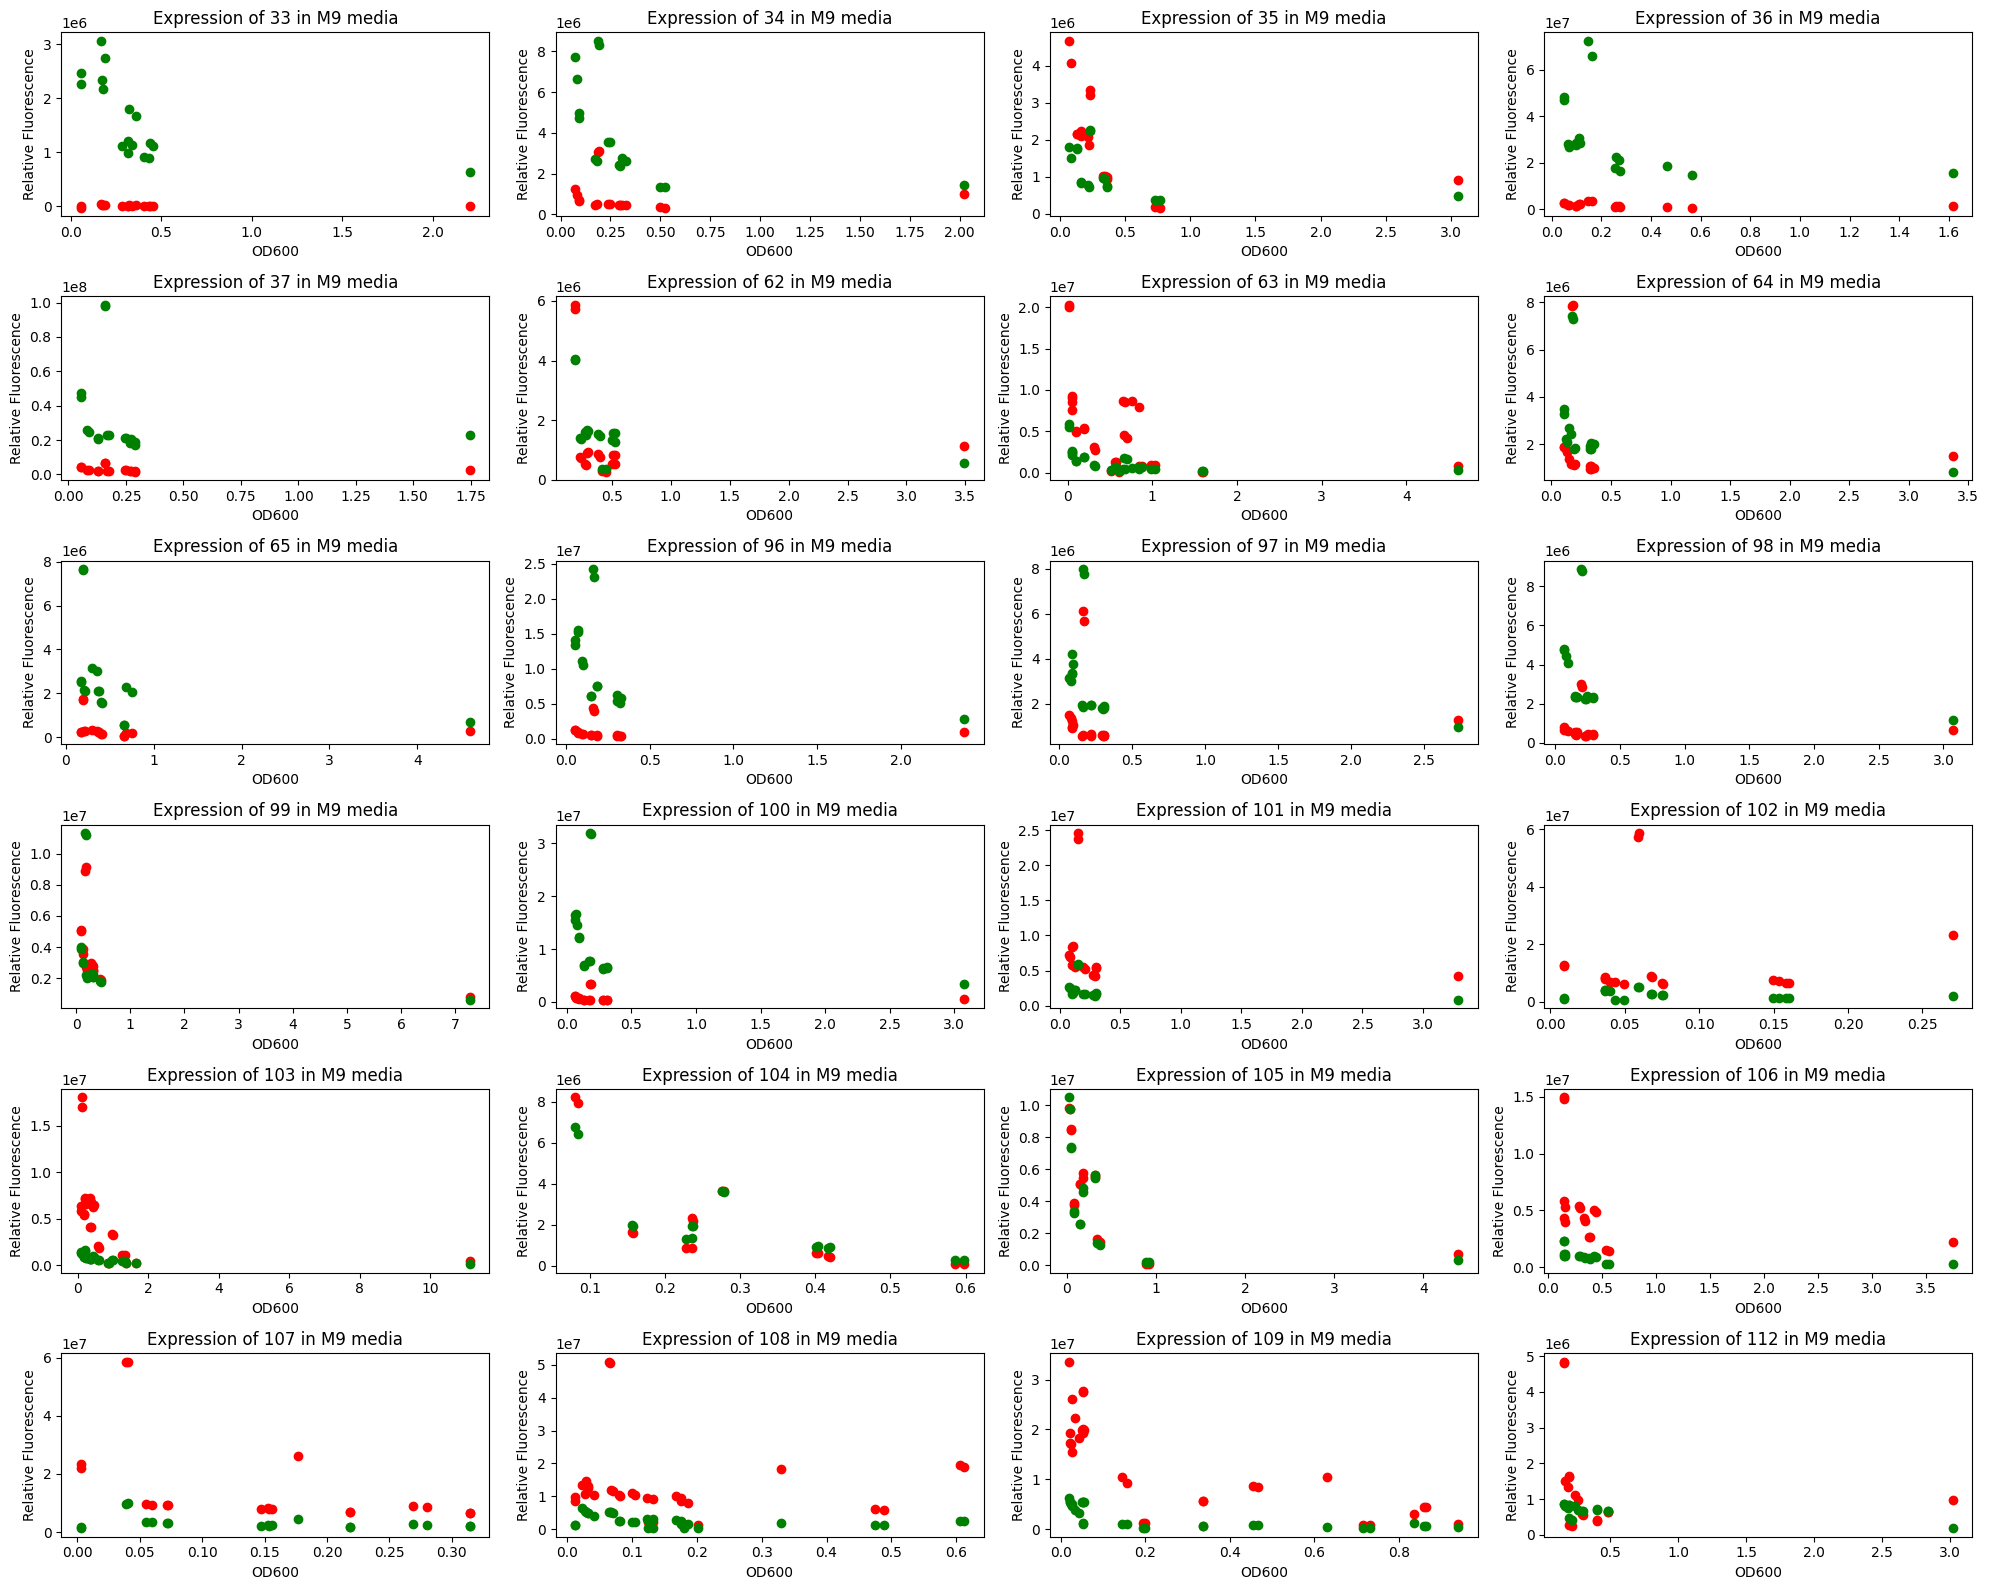

In [5]:
df_M9 = df[df['Media'] == 'M9']

fig, axes = plt.subplots(6, 4, figsize=(20, 16))
axes = axes.flatten()

for i, Ec in enumerate(df_M9['Ec'].unique()):
    group = df_M9[df_M9['Ec'] == Ec]
    axes[i].scatter(group['OD600'], group['Rel_RFP'], c='red')
    axes[i].scatter(group['OD600'], group['Rel_GFP'], c='green')
    axes[i].set_title(f'Expression of {Ec} in M9 media')
    axes[i].set_xlabel('OD600')
    axes[i].set_ylabel('Relative Fluorescence')

plt.tight_layout()
plt.show()

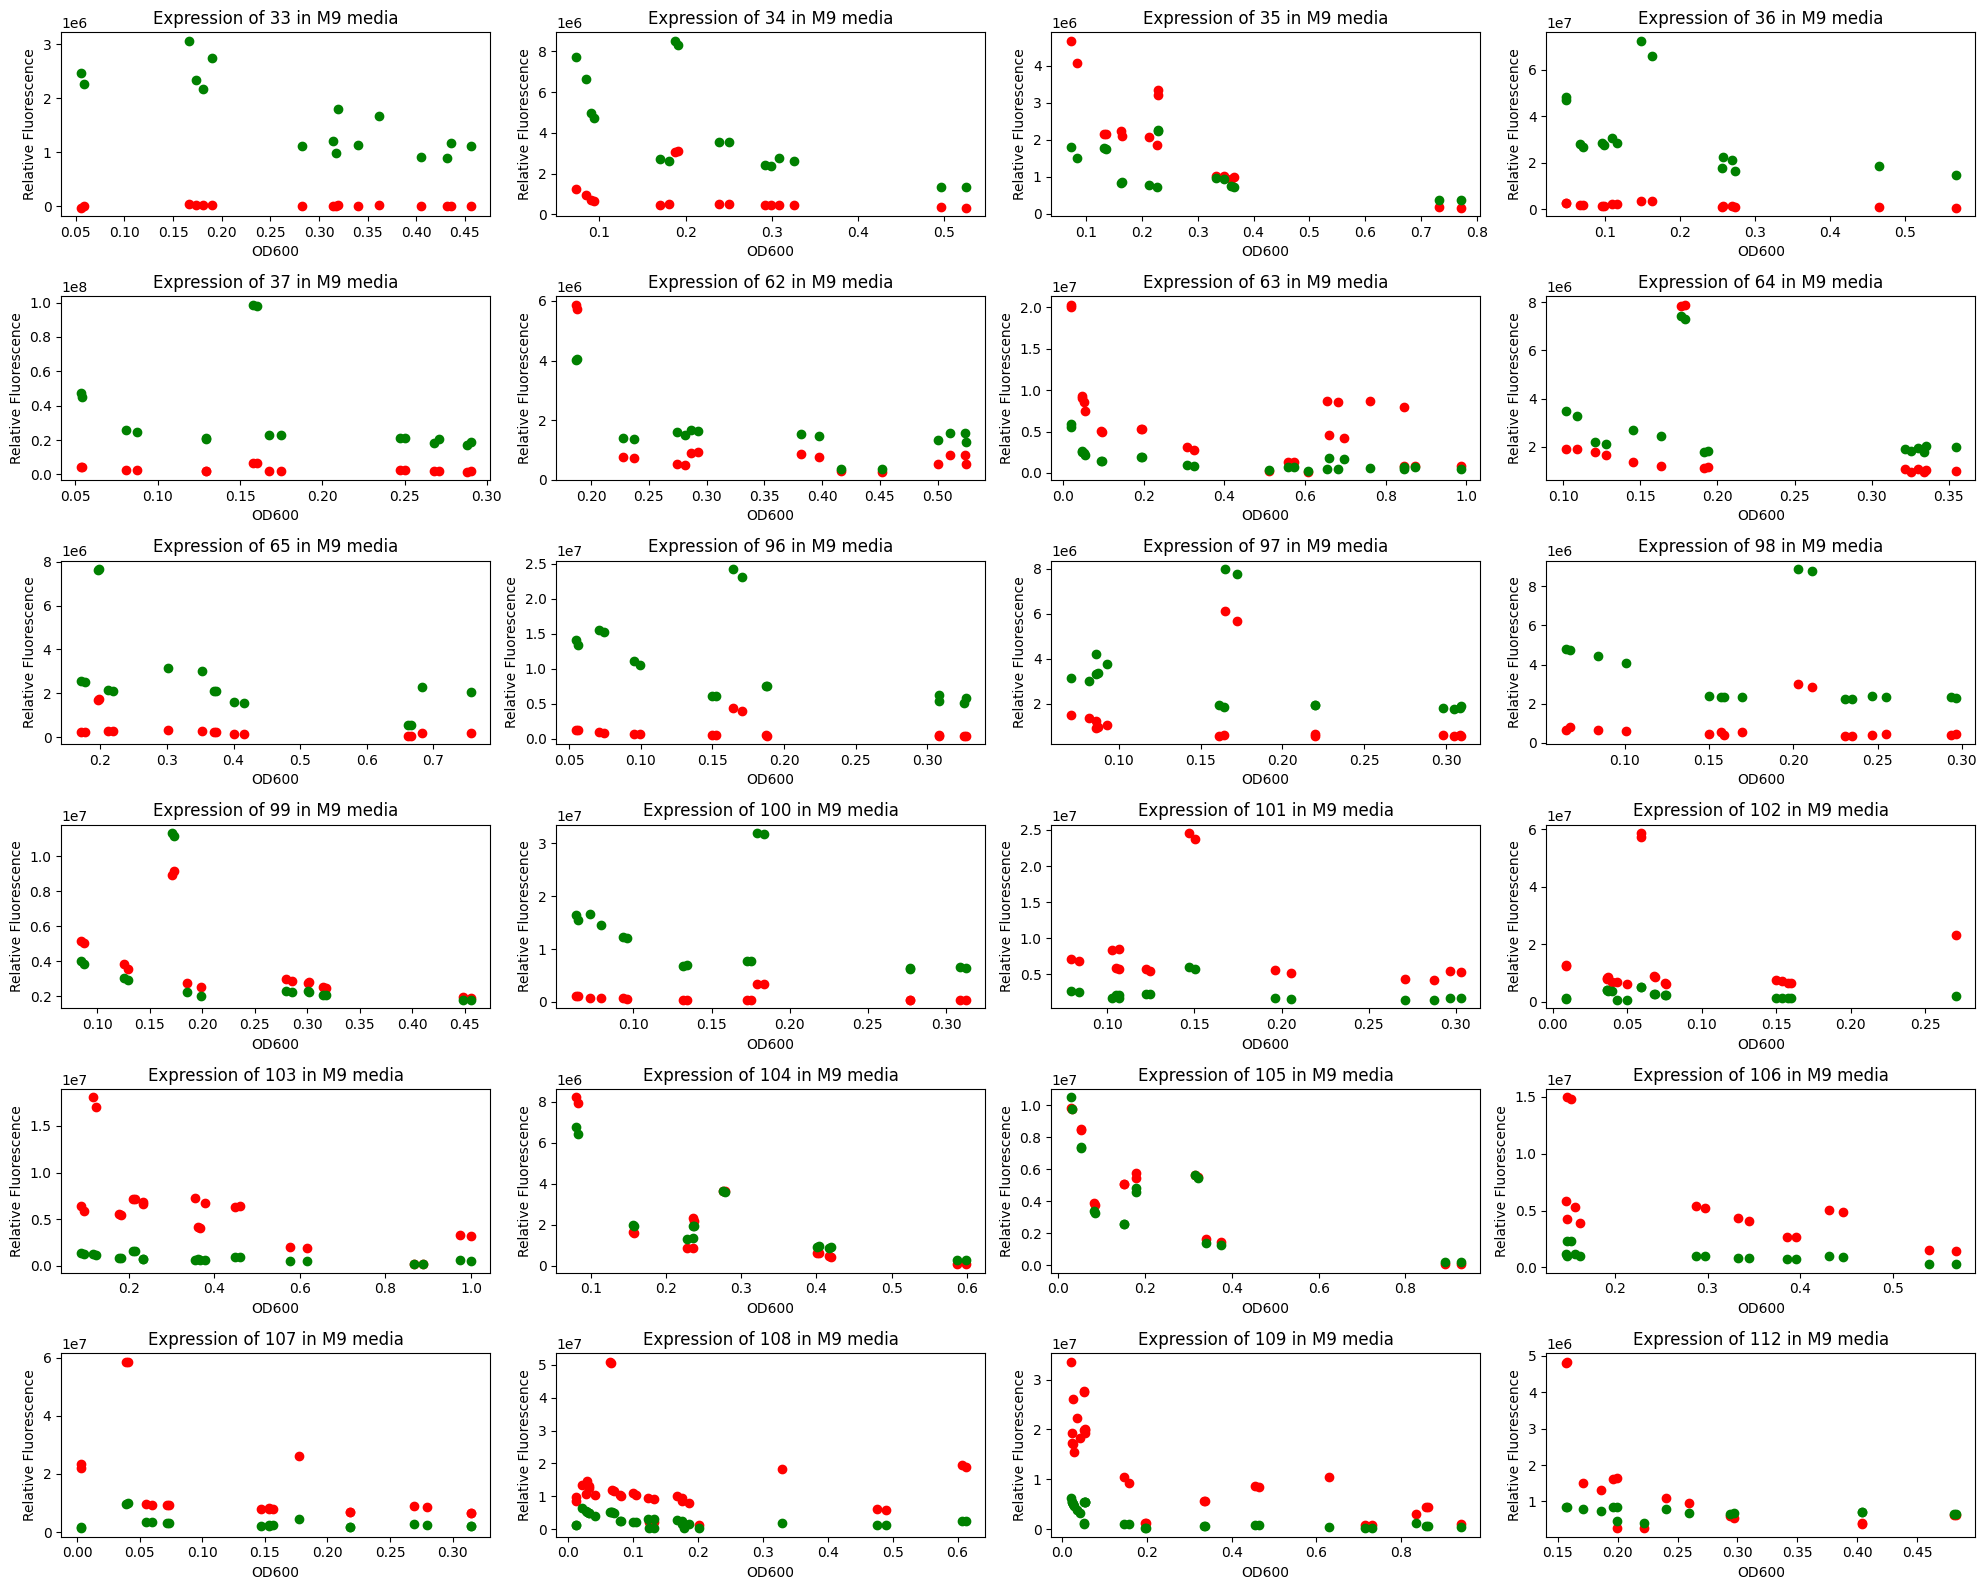

In [6]:
df_M9 = df[df['Media'] == 'M9']
df_M9 = df_M9[df_M9['OD600'] < 1]

fig, axes = plt.subplots(6, 4, figsize=(20, 16))
axes = axes.flatten()

for i, Ec in enumerate(df_M9['Ec'].unique()):
    group = df_M9[df_M9['Ec'] == Ec]
    axes[i].scatter(group['OD600'], group['Rel_RFP'], c='red')
    axes[i].scatter(group['OD600'], group['Rel_GFP'], c='green')
    axes[i].set_title(f'Expression of {Ec} in M9 media')
    axes[i].set_xlabel('OD600')
    axes[i].set_ylabel('Relative Fluorescence')

plt.tight_layout()
plt.show()

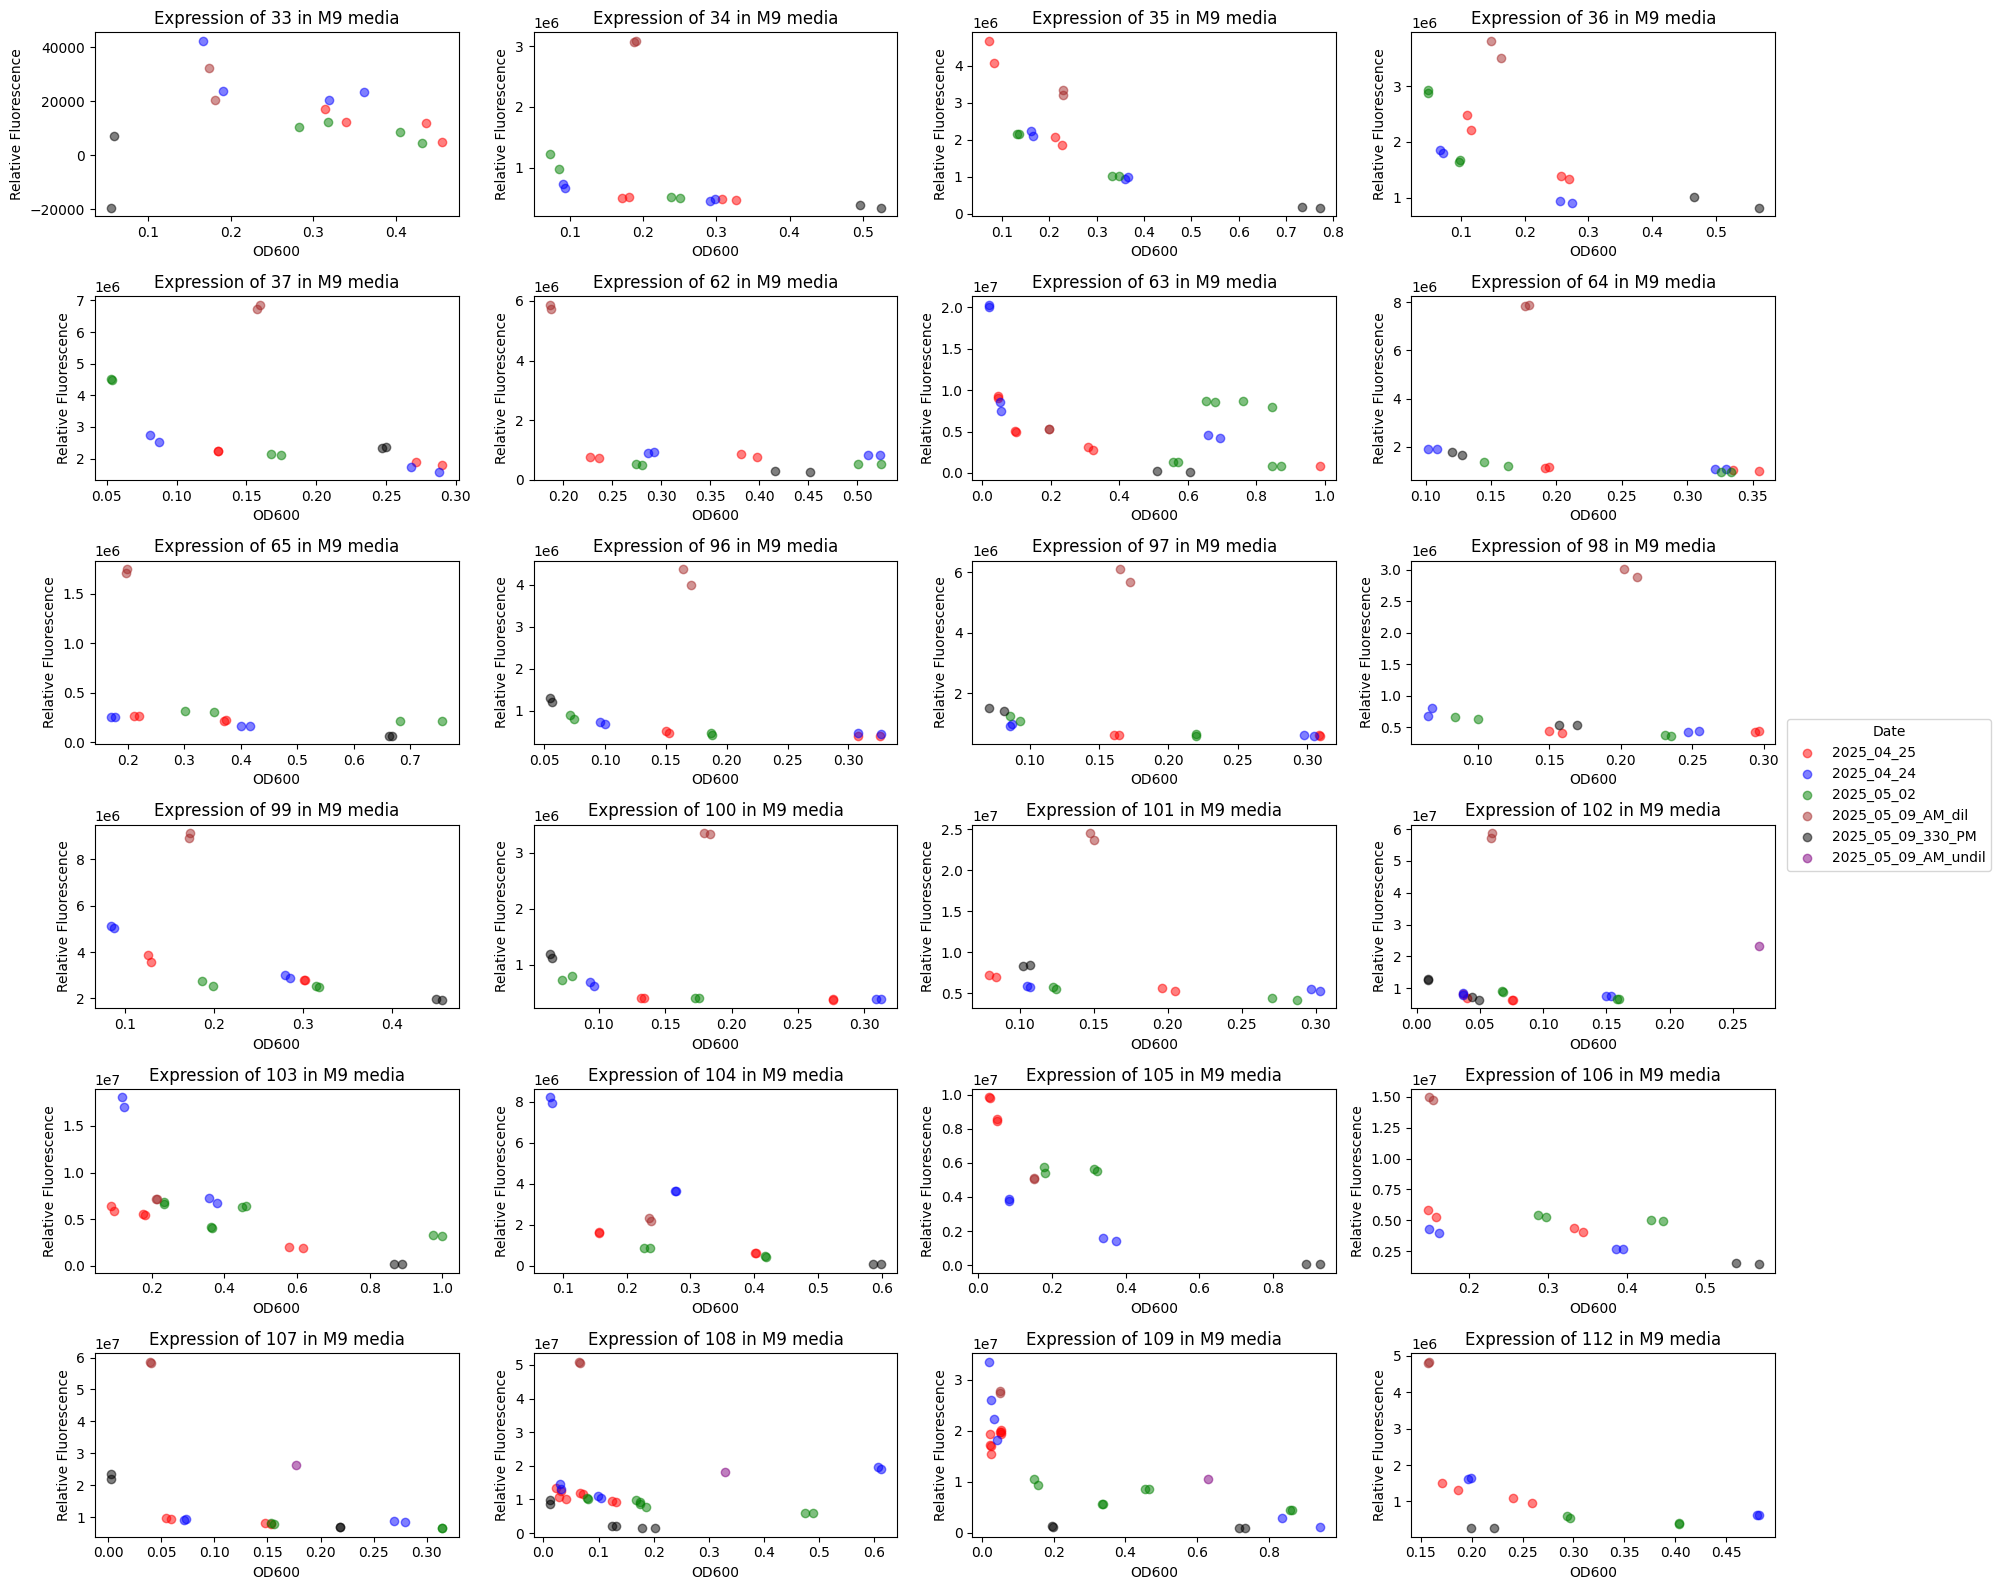

In [7]:
df_M9 = df[df['Media'] == 'M9'] 
df_M9 = df_M9[df_M9['OD600'] < 1]

fig, axes = plt.subplots(6, 4, figsize=(20, 16))
axes = axes.flatten()

color_map = {
    '2025_04_25' : 'red',
    '2025_04_24' : 'blue',
    '2025_05_02' : 'green',
    '2025_05_09_AM_undil' : 'purple',
    '2025_05_09_AM_dil' : 'brown',
    '2025_05_09_330_PM' : 'black',
}

legend_handles = {}

for i, Ec in enumerate(df_M9['Ec'].unique()):
    group = df_M9[df_M9['Ec'] == Ec]
    for idx, row in group.iterrows():
        date = row['Date']
        if date == '2025_05_09':
            date += '_' + row['Time']
        color = color_map[date]
        point = axes[i].scatter(row['OD600'], row['Rel_RFP'], color=color, alpha=0.5)
        if date not in legend_handles:
            legend_handles[date] = point
    axes[i].set_title(f'Expression of {Ec} in M9 media')
    axes[i].set_xlabel('OD600')
    axes[i].set_ylabel('Relative Fluorescence')

fig.legend(legend_handles.values(), legend_handles.keys(), title='Date', loc='center right')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


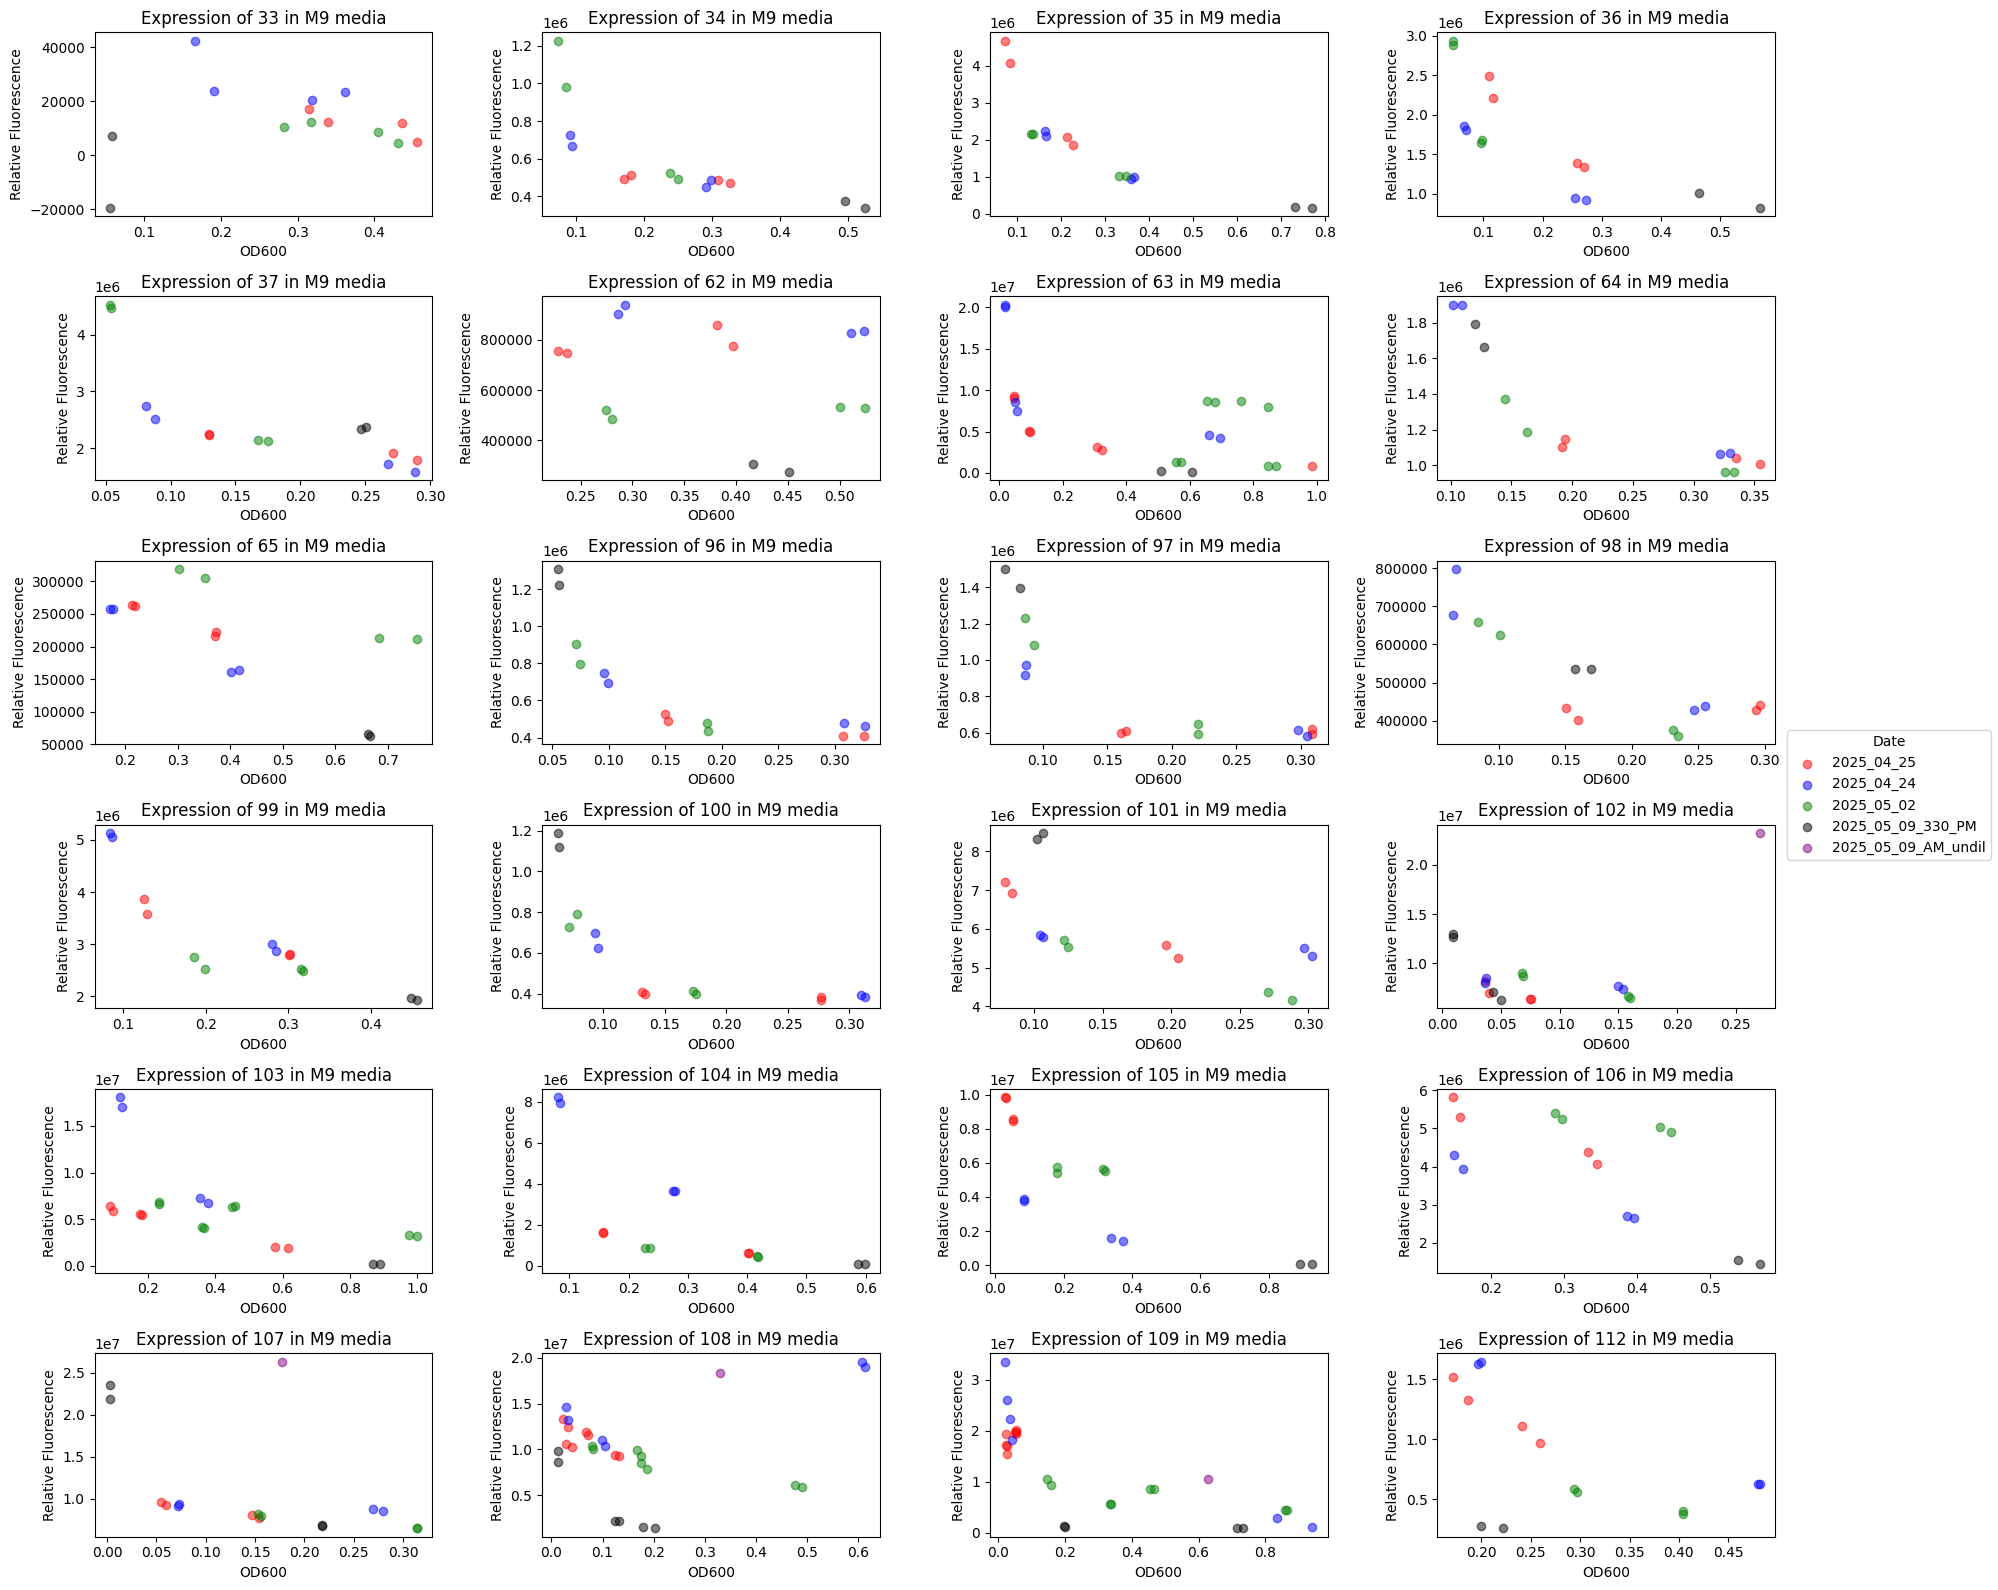

In [8]:
df_M9 = df[df['Media'] == 'M9'] 
df_M9 = df_M9[df_M9['OD600'] < 1]
df_M9 = df_M9[df_M9['Time'] != 'AM_dil'] 

fig, axes = plt.subplots(6, 4, figsize=(20, 16))
axes = axes.flatten()

color_map = {
    '2025_04_25' : 'red',
    '2025_04_24' : 'blue',
    '2025_05_02' : 'green',
    '2025_05_09_AM_undil' : 'purple',
    '2025_05_09_AM' : 'brown',
    '2025_05_09_330_PM' : 'black',
}

legend_handles = {}

for i, Ec in enumerate(df_M9['Ec'].unique()):
    group = df_M9[df_M9['Ec'] == Ec]
    for idx, row in group.iterrows():
        date = row['Date']
        if date == '2025_05_09':
            date += '_' + row['Time']
        color = color_map[date]
        point = axes[i].scatter(row['OD600'], row['Rel_RFP'], color=color, alpha=0.5)
        if date not in legend_handles:
            legend_handles[date] = point
    axes[i].set_title(f'Expression of {Ec} in M9 media')
    axes[i].set_xlabel('OD600')
    axes[i].set_ylabel('Relative Fluorescence')

fig.legend(legend_handles.values(), legend_handles.keys(), title='Date', loc='center right')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


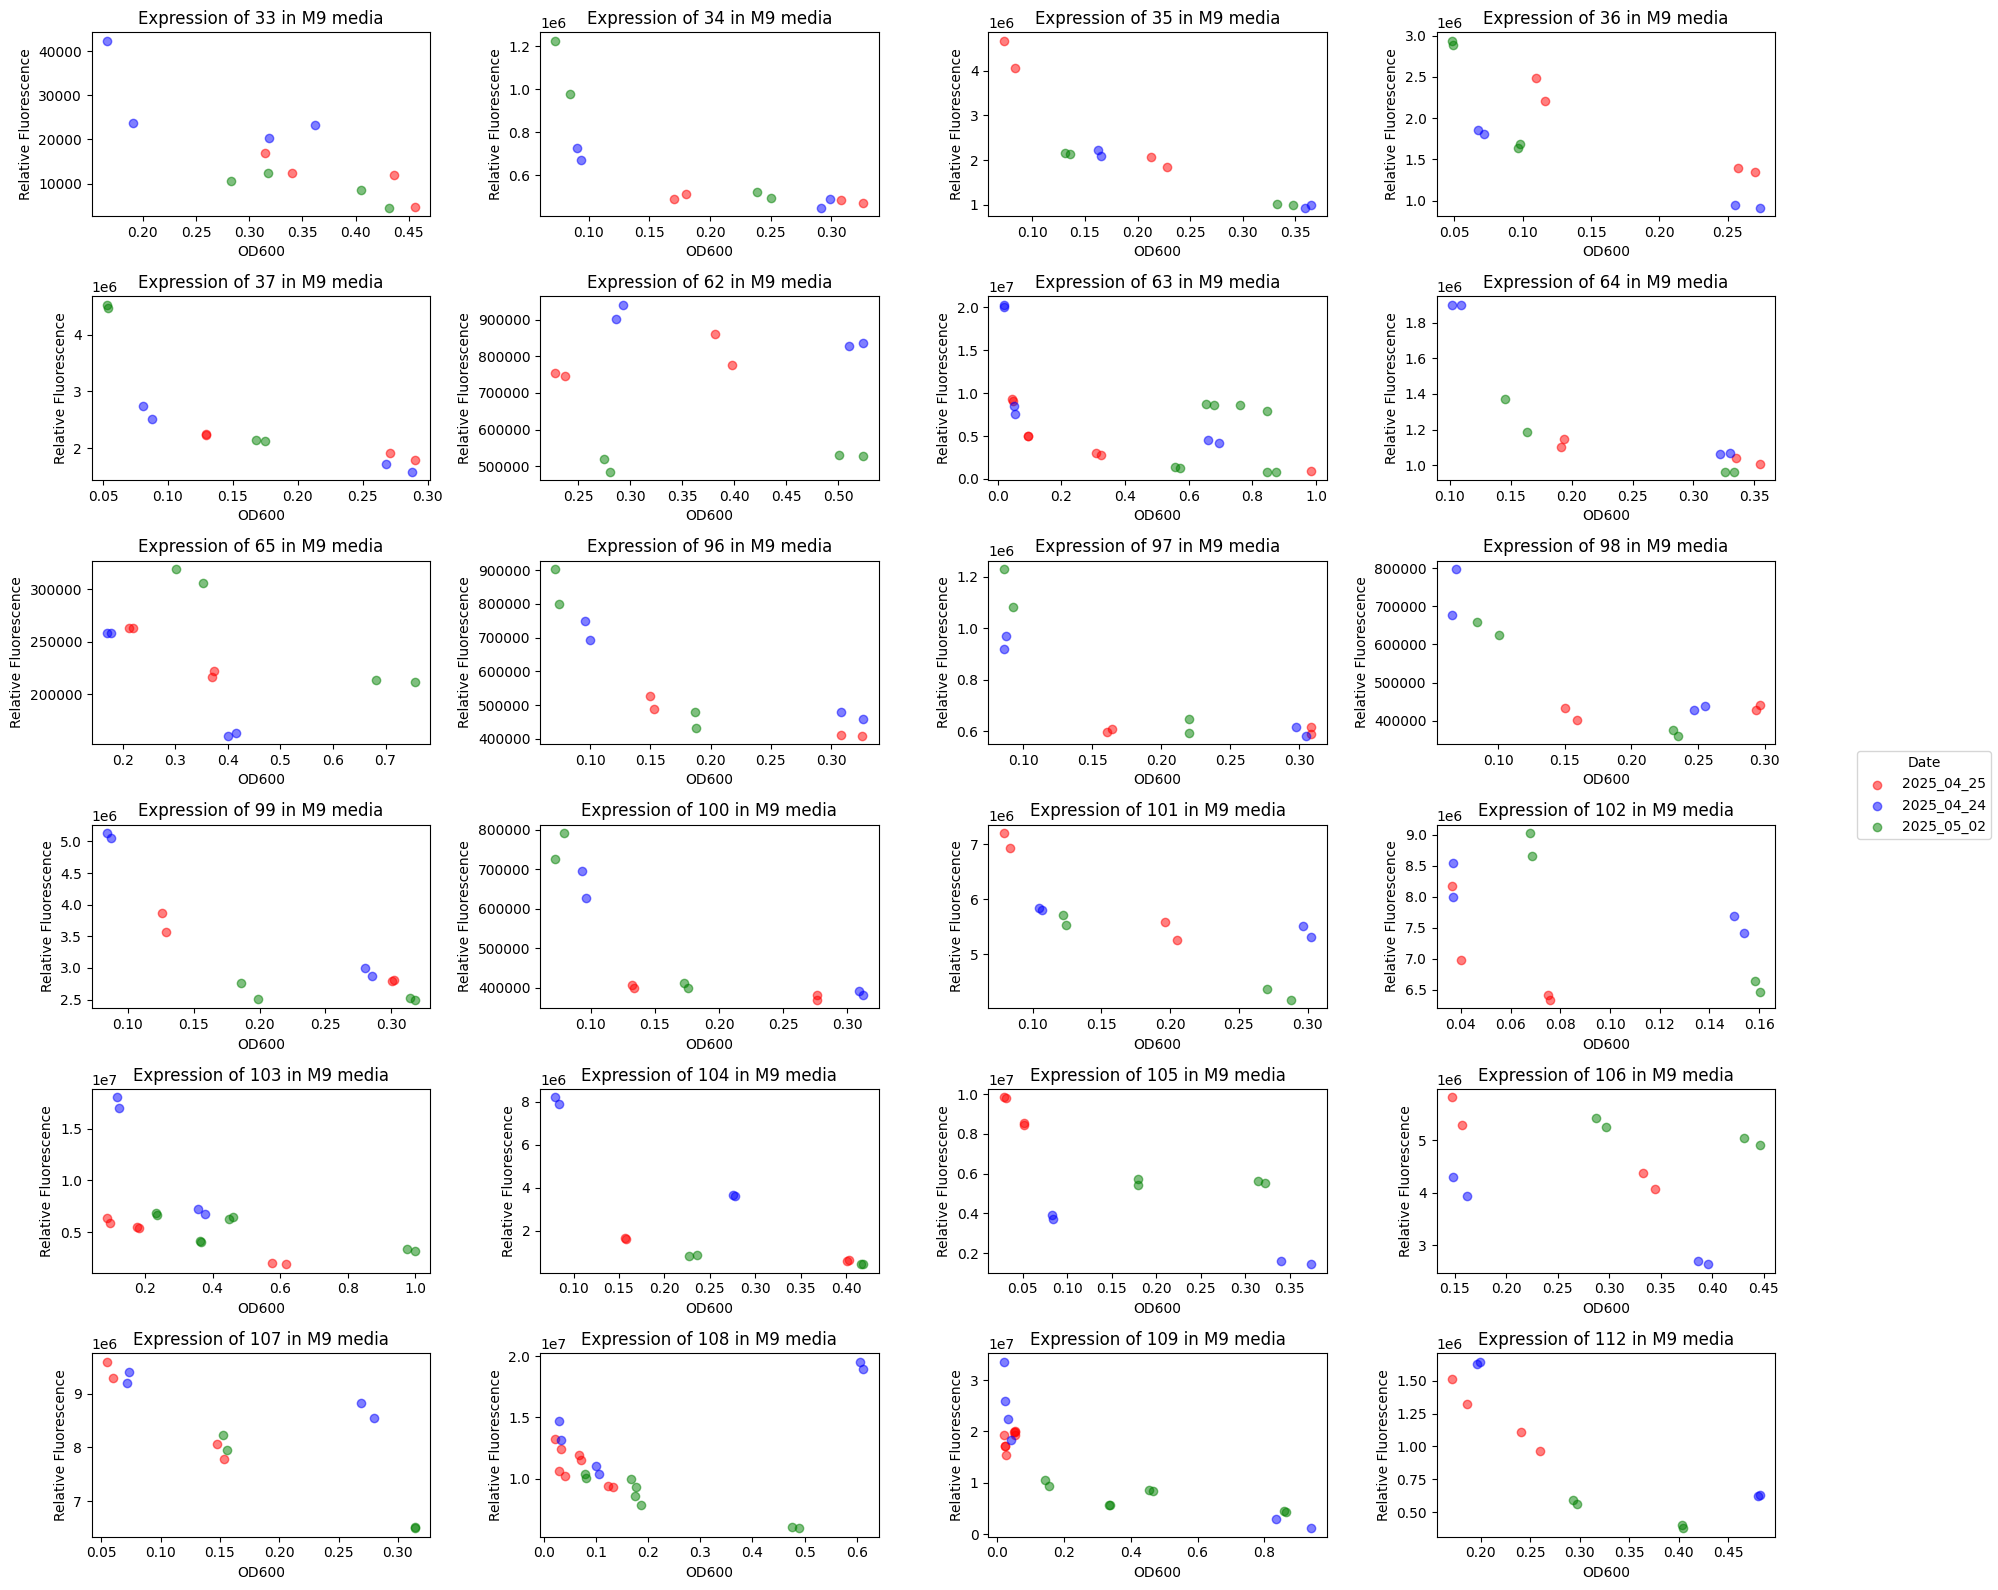

In [9]:
df_M9 = df[df['Media'] == 'M9'] 
df_M9 = df_M9[df_M9['OD600'] < 1]
df_M9 = df_M9[df_M9['Date'] != '2025_05_09'] 

fig, axes = plt.subplots(6, 4, figsize=(20, 16))
axes = axes.flatten()

color_map = {
    '2025_04_25' : 'red',
    '2025_04_24' : 'blue',
    '2025_05_02' : 'green',
}

legend_handles = {}

for i, Ec in enumerate(df_M9['Ec'].unique()):
    group = df_M9[df_M9['Ec'] == Ec]
    for idx, row in group.iterrows():
        date = row['Date']
        if date == '2025_05_09':
            date += '_' + row['Time']
        color = color_map[date]
        point = axes[i].scatter(row['OD600'], row['Rel_RFP'], color=color, alpha=0.5)
        if date not in legend_handles:
            legend_handles[date] = point
    axes[i].set_title(f'Expression of {Ec} in M9 media')
    axes[i].set_xlabel('OD600')
    axes[i].set_ylabel('Relative Fluorescence')

fig.legend(legend_handles.values(), legend_handles.keys(), title='Date', loc='center right')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


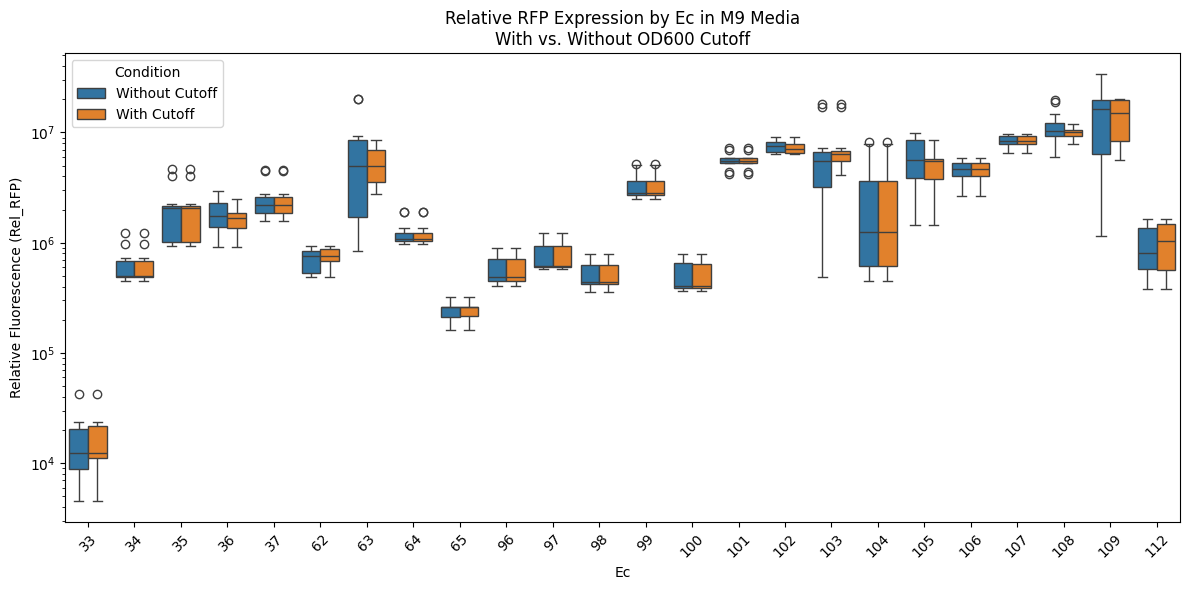

In [11]:
df_M9 = df[df['Media'] == 'M9']
df_M9 = df_M9[df_M9['Date'] != '2025_05_09']

df_no_cutoff = df_M9.copy()
df_no_cutoff['Condition'] = 'Without Cutoff'

df_with_cutoff = df_M9[(df_M9['OD600'] > 0.05) & (df_M9['OD600'] < 0.45)].copy()
df_with_cutoff['Condition'] = 'With Cutoff'

df_combined = pd.concat([df_no_cutoff, df_with_cutoff])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ec', y='Rel_RFP', hue='Condition', data=df_combined)
plt.title('Relative RFP Expression by Ec in M9 Media\nWith vs. Without OD600 Cutoff')
plt.xlabel('Ec')
plt.ylabel('Relative Fluorescence (Rel_RFP)')
plt.yscale('log')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



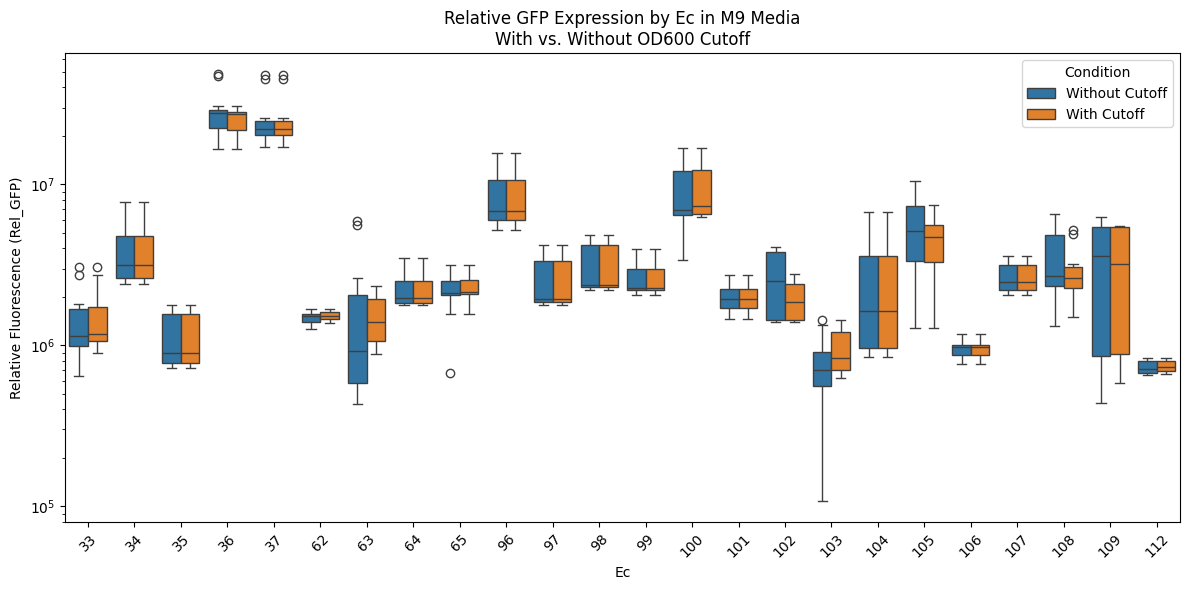

In [12]:
df_M9 = df[df['Media'] == 'M9']
df_M9 = df_M9[df_M9['Date'] != '2025_05_09']

df_no_cutoff = df_M9.copy()
df_no_cutoff['Condition'] = 'Without Cutoff'

df_with_cutoff = df_M9[(df_M9['OD600'] > 0.05) & (df_M9['OD600'] < 0.45)].copy()
df_with_cutoff['Condition'] = 'With Cutoff'

df_combined = pd.concat([df_no_cutoff, df_with_cutoff])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ec', y='Rel_GFP', hue='Condition', data=df_combined)
plt.title('Relative GFP Expression by Ec in M9 Media\nWith vs. Without OD600 Cutoff')
plt.xlabel('Ec')
plt.ylabel('Relative Fluorescence (Rel_GFP)')
plt.yscale('log')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


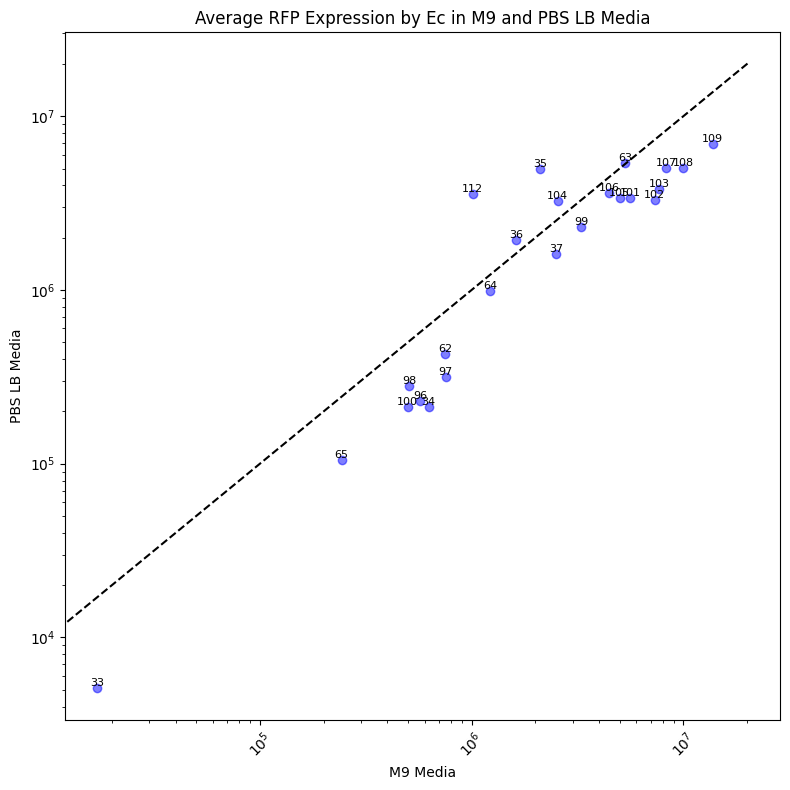

In [13]:
df_M9 = df[df['Media'] == 'M9']
df_M9 = df_M9[(df_M9['OD600'] > 0.05) & (df_M9['OD600'] < 0.45)]
df_M9 = df_M9[df_M9['Date'] != '2025_05_09']

df_PBSLB = df[df['Media'] == 'PBS_LB']
df_PBSLB = df_PBSLB[df_PBSLB['Time'] == '330_PM']

plt.figure(figsize=(8, 8))
for Ec in df_M9['Ec'].unique():
    M9_group = df_M9[df_M9['Ec'] == Ec]
    PBSLB_group = df_PBSLB[df_PBSLB['Ec'] == Ec]

    M9_mean = M9_group['Rel_RFP'].mean()
    PBSLB_mean = PBSLB_group['Rel_RFP'].mean()

    plt.scatter(M9_mean, PBSLB_mean, color='blue', alpha=0.5)
    plt.text(M9_mean, PBSLB_mean, str(Ec), fontsize=8, ha='center', va='bottom')


max_value = max(df_M9['Rel_RFP'].max(), df_PBSLB['Rel_RFP'].max())
plt.plot([0, max_value], [0, max_value], color='black', linestyle='--')

plt.title('Average RFP Expression by Ec in M9 and PBS LB Media')
plt.xlabel('M9 Media')
plt.ylabel('PBS LB Media')
plt.xscale('log')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
df_M9 = df[df['Media'] == 'M9']
df_M9 = df_M9[(df_M9['OD600'] > 0.05) & (df_M9['OD600'] < 0.45)]
df_M9 = df_M9[df_M9['Date'] != '2025_05_09']

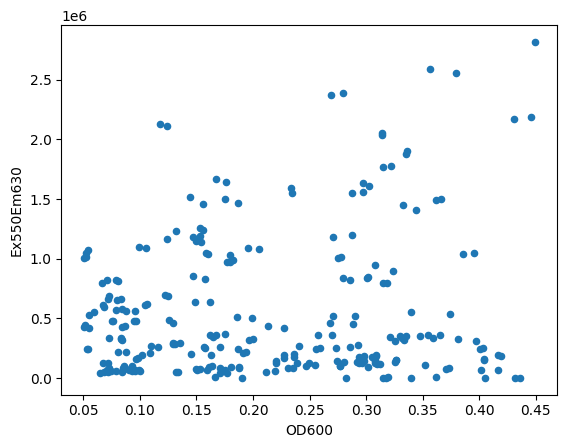

In [15]:
ax = df_M9.plot.scatter(x='OD600', y='Ex550Em630')
plt.show()

In [16]:
df_M9.head()

,Date,Time,Media,Ec,OD600,Ex485Em535,Ex550Em630,Description,sequence,Rel_RFP,Rel_GFP
0,2025_04_25,330_PM,M9,33,0.314510,383540.0,5355.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.702805e+04,1.219483e+06
1,2025_04_25,330_PM,M9,33,0.340022,388601.0,4213.5,pClone_GFP,CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT,1.239184e+04,1.142869e+06
2,2025_04_25,330_PM,M9,34,0.180372,472020.0,92525.5,P5_G3A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,5.129690e+05,2.616918e+06
3,2025_04_25,330_PM,M9,34,0.170433,467968.0,83579.5,P5_G3A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,4.903944e+05,2.745755e+06
4,2025_04_25,330_PM,M9,35,0.083273,124494.0,337765.5,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,4.056124e+06,1.495011e+06


In [17]:
oberved_df = df_M9.groupby(['Ec']).agg({'Rel_RFP': 'mean', 'Rel_GFP': 'mean'}).reset_index()
oberved_df.head()

,Ec,Rel_RFP,Rel_GFP
0,33,1.701534e+04,1.523606e+06
1,34,6.265661e+05,3.900289e+06
2,35,2.101394e+06,1.115027e+06
3,36,1.627661e+06,2.479616e+07
4,37,2.501086e+06,2.542316e+07


In [18]:
oberved_df.to_csv('../data/RFP/Observed_RFP_GFP.txt', sep='\t', index=False)